This is an initial playground to work and interact with the chatbot

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the path so we can import 'src'
sys.path.append(os.path.abspath(".."))

print("Setup complete. Environment ready.")

Failed to read module file 'C:\Users\fleur\AppData\Local\Programs\Python\Python311\Lib\re\_casefix.py' for module 're._casefix': UnicodeDecodeError
Traceback (most recent call last):
  File "c:\Users\fleur\Desktop\MSDS\Classes\498 Captstone\baseball_chatbot\venv\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fleur\Desktop\MSDS\Classes\498 Captstone\baseball_chatbot\venv\Lib\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\fleur\AppData\Local\Programs\Python\Python311\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap

✅ Setup complete. Environment ready.


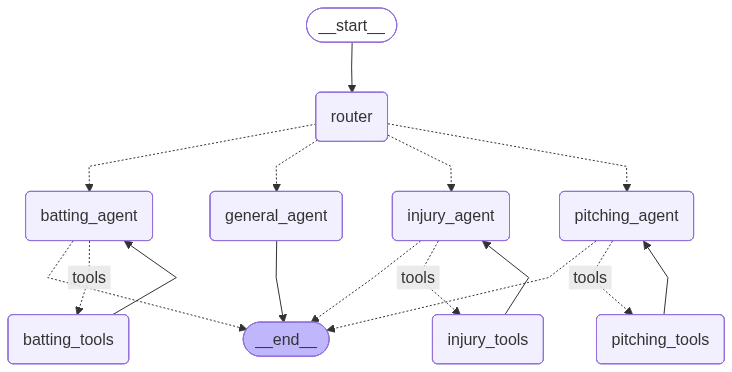

In [ ]:
from IPython.display import Image, display
from src.graph import build_graph

# Compile the graph
app = build_graph()

# Draw the graph
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    print("Could not draw graph. (Requires mermaid-cli).")

In [6]:
from langchain_core.messages import HumanMessage
# "thread_id" acts like a Session ID. 
config = {"configurable": {"thread_id": "test_session_1"}}

print("Baseball Bot Ready! Type 'quit' or 'exit' to stop.")
print("-----------------------------------------------------")

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    inputs = {"messages": [HumanMessage(content=user_input)]}
    print(f"\nProcessing...")

    try:
        for event in app.stream(inputs, config=config):
            for node_name, node_output in event.items():
                
                # 1. SHOW THE ROUTING DECISION (The Pass Off)
                if node_name == "router" and "next_agent" in node_output:
                    decision = node_output["next_agent"]
                    print(f"   [Router] Decided to handoff to: '{decision}'")
                
                # 2. SHOW PROFILE UPDATES
                if "profile" in node_output:
                    new_profile = node_output["profile"]
                    name = new_profile.get("name", "Unknown")
                    print(f"   [State] Active Player set to '{name}'")

                # 3. SHOW NODE COMPLETION
                print(f"--- Node '{node_name}' finished ---")

                # 4. SHOW BOT RESPONSE
                if "messages" in node_output:
                    last_msg = node_output["messages"][-1]
                    # Check if it's a real text message (not a tool call)
                    if hasattr(last_msg, 'content') and last_msg.content:
                        print(f"Bot: {last_msg.content}")
        
        print("-" * 50)

    except Exception as e:
        print(f"Error: {e}")

Baseball Bot Ready! Type 'quit' or 'exit' to stop.
-----------------------------------------------------

Processing...
   [Router] Decided to handoff to: 'general_agent'
--- Node 'router' finished ---

 DEBUG: General Agent Memory Size: 1
   [0] human: Who won the 2000 world series?...
--- Node 'general_agent' finished ---
Bot: The New York Yankees won the 2000 World Series, defeating the New York Mets in five games.
--------------------------------------------------

Processing...
   [Router] Decided to handoff to: 'general_agent'
--- Node 'router' finished ---

 DEBUG: General Agent Memory Size: 3
   [0] human: Who won the 2000 world series?...
   [1] ai: The New York Yankees won the 2000 World Series, defeating the New York Mets in five games....
   [2] human: Who was their pitcher?...
--- Node 'general_agent' finished ---
Bot: The Yankees' starting pitcher in the 2000 World Series included Roger Clemens, who played a significant role in the series.
--------------------------------